<a href="https://colab.research.google.com/github/gursaveks/Personal-Expense-Tracker/blob/main/Employee%20Turnover%20Analytics%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

# Load the dataset
data = pd.read_csv('hr_comma_sep.csv')

# Check for missing values
missing_values = data.isnull().sum()
print(missing_values)
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()
# Plot the distribution of employee satisfaction
sns.histplot(data['satisfaction_level'], kde=True)
plt.title('Distribution of Employee Satisfaction')
plt.show()

# Plot the distribution of employee evaluation
sns.histplot(data['last_evaluation'], kde=True)
plt.title('Distribution of Employee Evaluation')
plt.show()

# Plot the distribution of average monthly hours
sns.histplot(data['average_montly_hours'], kde=True)
plt.title('Distribution of Average Monthly Hours')
plt.show()
# Plot the employee project count for those who left and stayed
sns.countplot(x='number_project', hue='left', data=data)
plt.title('Employee Project Count for Those Who Left and Stayed')
plt.show()
from sklearn.cluster import KMeans

# Select relevant columns
left_employees = data[data['left'] == 1]
clustering_data = left_employees[['satisfaction_level', 'last_evaluation']]

# Perform K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(clustering_data)

# Add cluster labels to the data
left_employees['cluster'] = clusters

# Plot the clusters
sns.scatterplot(x='satisfaction_level', y='last_evaluation', hue='cluster', data=left_employees, palette='viridis')
plt.title('K-means Clustering of Employees Who Left')
plt.show()
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Convert categorical columns to numerical
data = pd.get_dummies(data, columns=['Department', 'salary'])

# Split the data into train and test sets
X = data.drop('left', axis=1)
y = data['left']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123, stratify=y)

# Apply SMOTE to the training data
smote = SMOTE(random_state=123)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

# Train a logistic regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg_cv_scores = cross_val_score(log_reg, X_train_smote, y_train_smote, cv=5)

# Print classification report
log_reg.fit(X_train_smote, y_train_smote)
y_pred = log_reg.predict(X_test)
print(classification_report(y_test, y_pred))
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest Classifier model
rf_clf = RandomForestClassifier()
rf_cv_scores = cross_val_score(rf_clf, X_train_smote, y_train_smote, cv=5)

# Print classification report
rf_clf.fit(X_train_smote, y_train_smote)
y_pred = rf_clf.predict(X_test)
print(classification_report(y_test, y_pred))
from sklearn.ensemble import GradientBoostingClassifier

# Train a Gradient Boosting Classifier model
gb_clf = GradientBoostingClassifier()
gb_cv_scores = cross_val_score(gb_clf, X_train_smote, y_train_smote, cv=5)

# Print classification report
gb_clf.fit(X_train_smote, y_train_smote)
y_pred = gb_clf.predict(X_test)
print(classification_report(y_test, y_pred))
from sklearn.metrics import roc_auc_score, roc_curve

# Calculate and plot ROC curve for each model
models = {'Logistic Regression': log_reg, 'Random Forest': rf_clf, 'Gradient Boosting': gb_clf}
for name, model in models.items():
    model.fit(X_train_smote, y_train_smote)
    y_proba = model.predict_proba(X_test)[:, 1]
    auc_score = roc_auc_score(y_test, y_proba)
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.show()
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Plot confusion matrix for each model
for name, model in models.items():
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Stayed', 'Left'])
    disp.plot()
    plt.title(f'Confusion Matrix for {name}')
    plt.show()
best_model = gb_clf  # Assuming Gradient Boosting is the best model
y_proba = best_model.predict_proba(X_test)[:, 1]
data['turnover_probability'] = y_proba
def categorize_employee(probability):
    if probability < 0.2:
        return 'Safe Zone'
    elif probability < 0.6:
        return 'Low-Risk Zone'
    elif probability < 0.9:
        return 'Medium-Risk Zone'
    else:
        return 'High-Risk Zone'

data['risk_zone'] = data['turnover_probability'].apply(categorize_employee)

# Suggested strategies for each zone
retention_strategies = {
    'Safe Zone': 'Continue current engagement practices.',
    'Low-Risk Zone': 'Offer small incentives and career growth opportunities.',
    'Medium-Risk Zone': 'Provide targeted support and address any concerns.',
    'High-Risk Zone': 'Initiate immediate intervention plans to retain employees.'
}

print(data[['turnover_probability', 'risk_zone']])
print(retention_strategies)


satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64


ValueError: could not convert string to float: 'sales'

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64


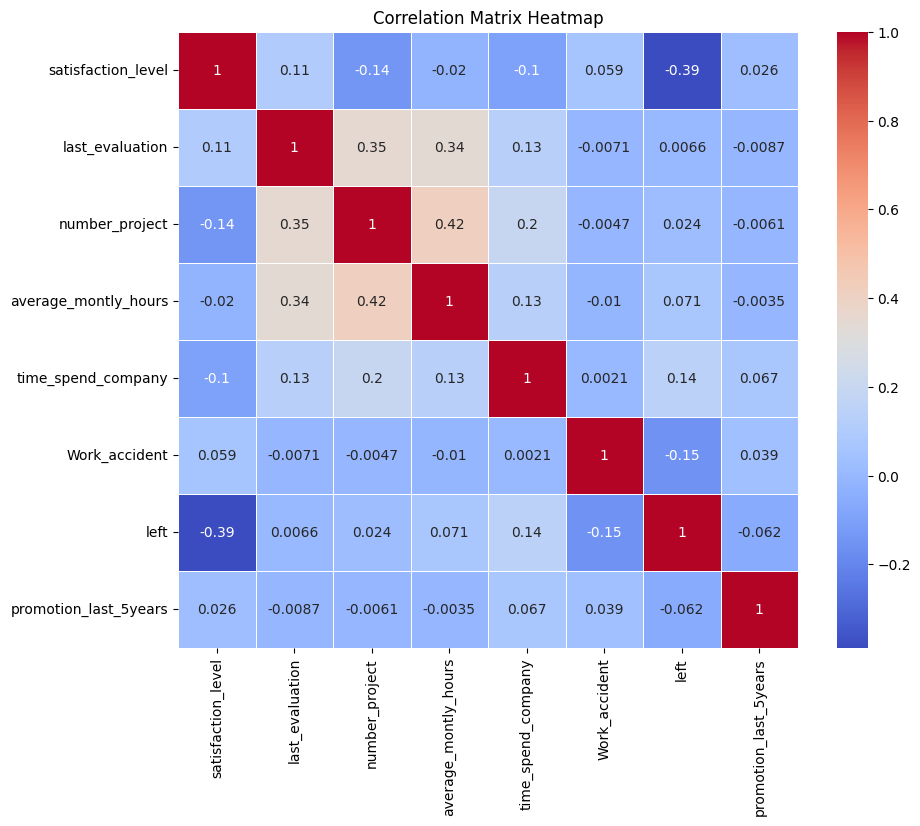

In [3]:
import pandas as pd

# Load the dataset
data = pd.read_csv('hr_comma_sep.csv')

# Check for missing values
missing_values = data.isnull().sum()
print(missing_values)
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical features for correlation analysis
numerical_data = data.select_dtypes(include=['number'])

# Calculate the correlation matrix using only numerical features
correlation_matrix = numerical_data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

# ... (rest of your code) ...